## Fall 2023

In [2]:
fall = pd.read_csv("Fall 2023.csv")

In [3]:
fall['Graduate Student'] = fall['Graduate Student'].fillna('No')
fall['Instructor _Title'] = fall['Instructor _Title'].fillna('Unk')
fall['Link ID'] = fall['Link ID'].fillna('Unk')
fall['Link Cnct'] = fall['Link Cnct'].fillna('Unk')
fall['XList Group'] = fall['XList Group'].fillna('Unk')
fall['XList Enrl'] = fall['XList Enrl'].fillna(0)
fall['XList Max Enrl'] = fall['XList Max Enrl'].fillna(0)
fall['XList Seats Avail'] = fall['XList Seats Avail'].fillna(0)
fall['Days'] = fall['Days'].fillna('Unlisted')

# cast
fall['Lim**'] = fall['Lim**'].replace('None', 0)
fall['Lim**'] = fall['Lim**'].astype(int)


In [9]:
fall.to_csv('clean_fall.csv', index=False)

In [4]:
len(fall['Instructor _Title'].unique())

60

In [5]:
fall['IType'].unique()

array(['LEC', 'DIS'], dtype=object)

In [6]:
group_instructorSubject = fall.groupby(['Instructor', 'Instructor _Title', 'Department'], as_index=False)['Subject'].count()

In [7]:
group_instructorSubject

,Instructor,Instructor _Title,Department,Subject
0,"Aguirre, Milton E.",Assistant Professor,School of Engineering Tech,3
1,"Akdere, Mesut",Professor,Technology Ldrshp & Innovatn,1
2,"Alcorn, Brandon M.",Professor,Naval Science,2
3,"Allison, Christopher S.",Lecturer,Schl of Construction Mgmt Tech,2
4,"Asunda, Paul A.",Associate Professor,Purdue Polytechnic Inst Admin,1
...,...,...,...,...
246,"Zhu, Yi",Student,Computer Information Tech,1
247,"Ziakkas, Dimitrios",Assistant Professor,Schl of Aviation & Transp Tech,3
248,"Zimpfer, Mark D.",Associate Professor of Practice,Schl of Construction Mgmt Tech,3
249,"Ziulkowski, Jonathon D.",Senior Lecturer,Schl of Aviation & Transp Tech,3


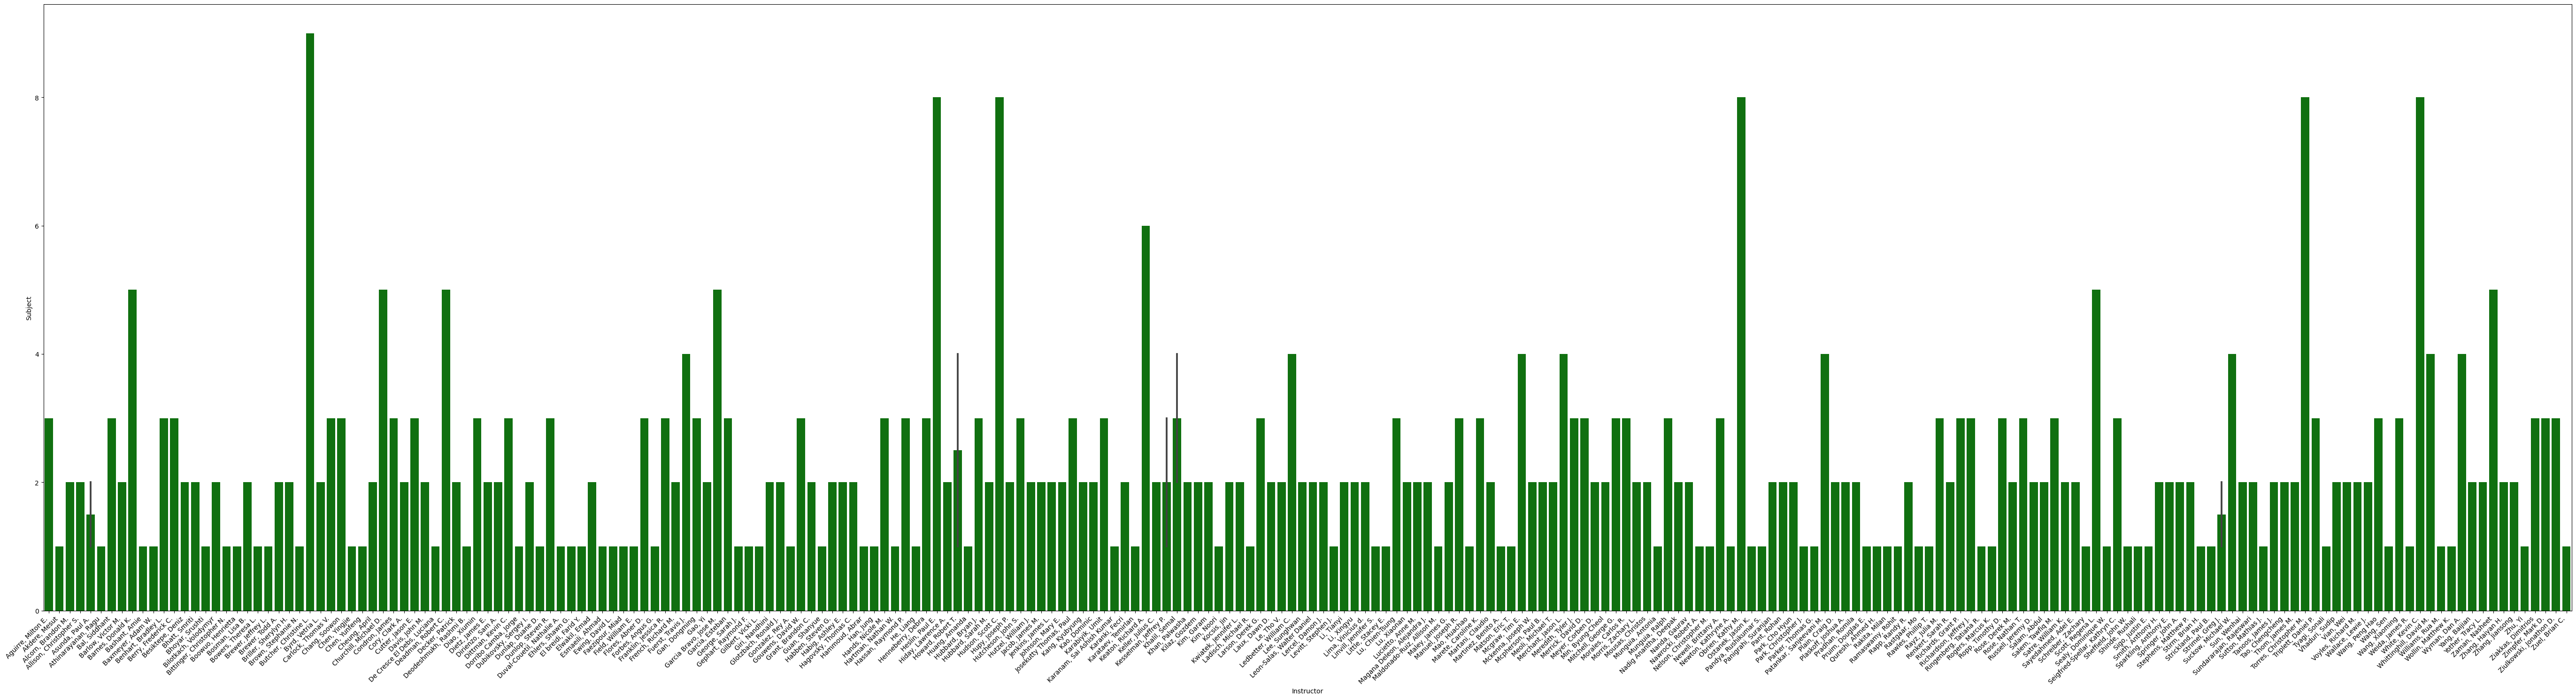

In [8]:
plt.figure(figsize=(55,15))
plt.xticks(rotation=45, ha='right')
sns.barplot(group_instructorSubject, x='Instructor', y='Subject', color='green')
plt.tight_layout()
plt.show()

In [9]:
group_DepartmentInstructors = fall.groupby(['Department'], as_index=False)['Instructor'].count()

In [10]:
group_DepartmentInstructors

,Department,Instructor
0,Aerospace Studies,9
1,Computer Graphics Technology,61
2,Computer Information Tech,88
3,Military Science,53
4,Naval Science,26
5,Purdue Polytechnic Inst Admin,17
6,Schl of Aviation & Transp Tech,88
7,Schl of Construction Mgmt Tech,54
8,School of Engineering Tech,108
9,Technology Ldrshp & Innovatn,41


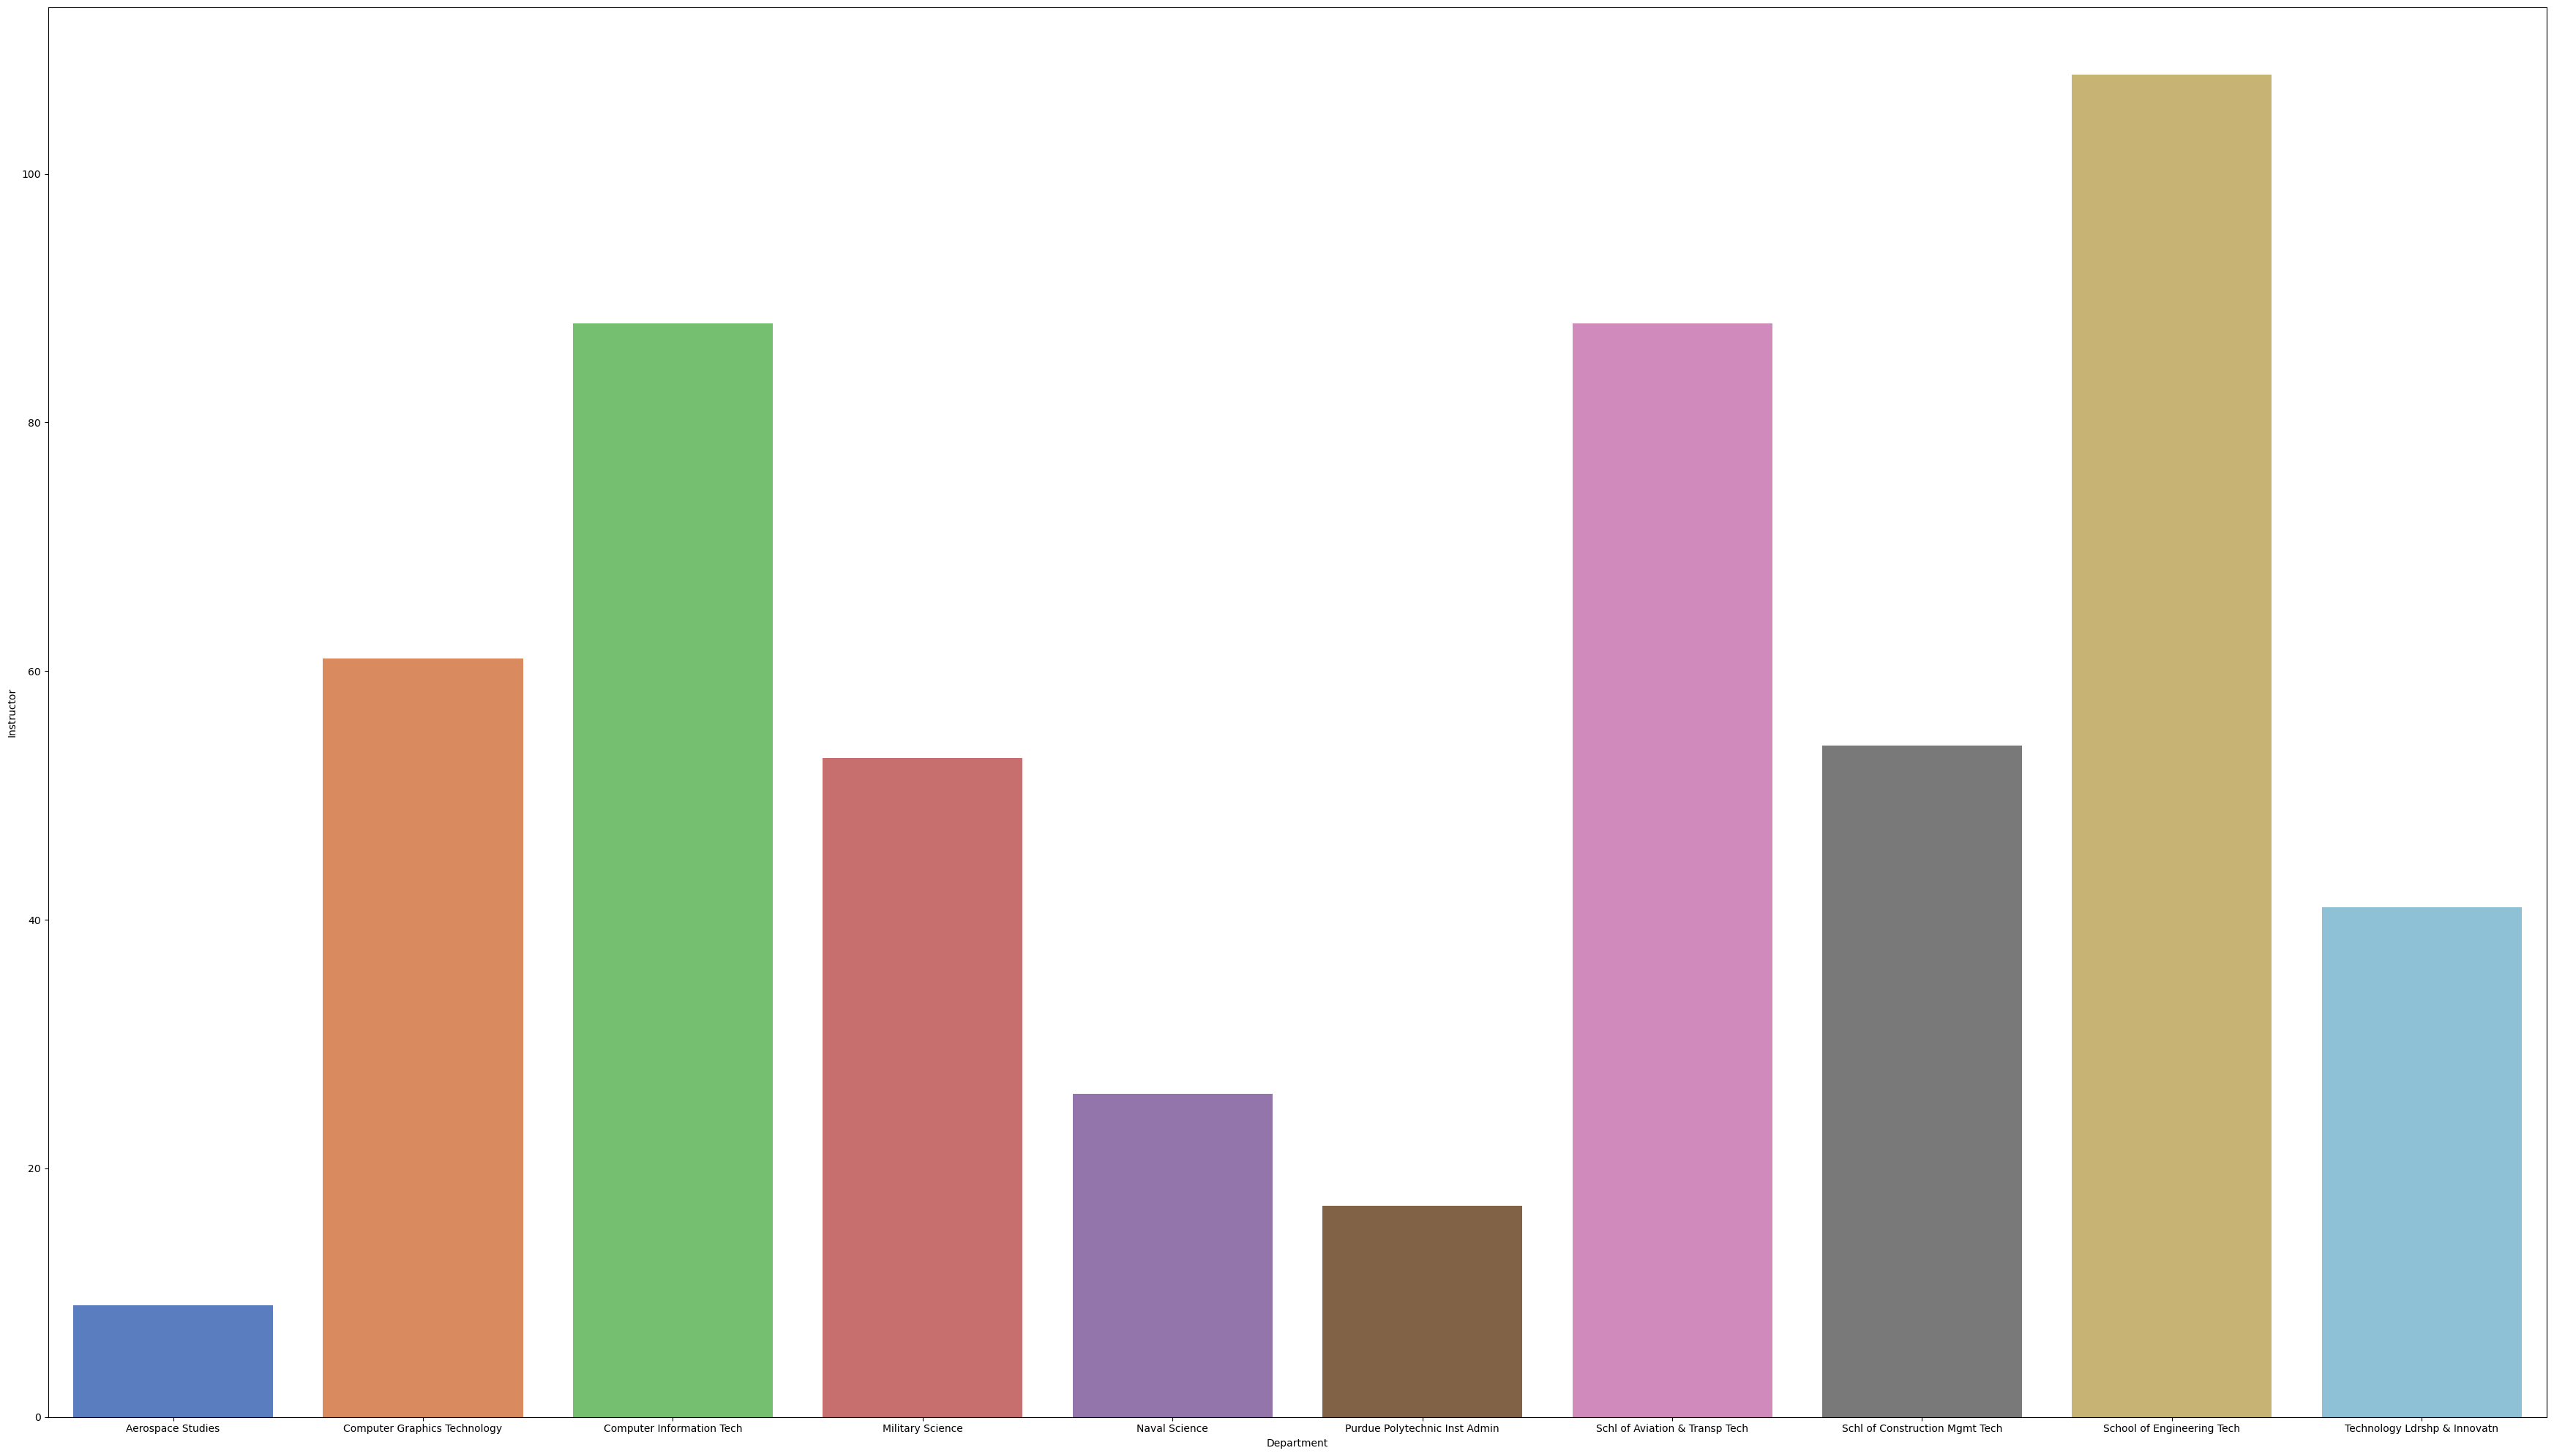

In [11]:
plt.figure(figsize=(35,20))
sns.barplot(group_DepartmentInstructors, x='Department', y='Instructor', palette='muted')
plt.tight_layout()
plt.show()

In [12]:
# aggregate for these: count of courses, sum of credit hours, sum of course enrollment, sum of course capacity
aggregated_fall = fall.groupby(['Instructor', 'Title', 'Subject', 'Crs .'],as_index=False).agg({'CRN': 'count', 'Max Credit': 'sum', 'Enrl*': 'sum', 'Lim**': 'sum'})

In [13]:
aggregated_fall.rename({'CRN': 'course_count', 'Max Credit': 'MC_Sum', 'Enrl*': 'Enrolled_Sum', 'Lim**': 'Capacity_Sum', 'Sec .': 'section_count'}, axis=1, inplace=True)

In [14]:
#aggregated_spring.to_csv('FA23.csv', index=False)

In [15]:
test_df = fall.groupby(['Instructor', 'Instructor _Title', 'Department']).apply(lambda group: pd.Series({
    'Courses': list(zip(group['Subject'], group['Crs .'])),
    'Course_count': group['CRN'].nunique(),
    'Sum_MaxCredits': group['Max Credit'].sum(),
    'Sum_Enrollment': group['Enrl*'].sum(),
    'Sum_Capacity': group['Lim**'].sum()
})).reset_index()

test_df

,Instructor,Instructor _Title,Department,Courses,Course_count,Sum_MaxCredits,Sum_Enrollment,Sum_Capacity
0,"Aguirre, Milton E.",Assistant Professor,School of Engineering Tech,"[(ENGT, 48000), (ENGT, 48000), (ENGT, 48100)]",3,9,239,275
1,"Akdere, Mesut",Professor,Technology Ldrshp & Innovatn,"[(TLI, 45570)]",1,3,16,30
2,"Alcorn, Brandon M.",Professor,Naval Science,"[(NS, 31100), (NS, 31100)]",2,6,19,40
3,"Allison, Christopher S.",Lecturer,Schl of Construction Mgmt Tech,"[(CM, 23301), (CM, 35000)]",2,12,101,130
4,"Asunda, Paul A.",Associate Professor,Purdue Polytechnic Inst Admin,"[(TECH, 64600)]",1,3,30,35
...,...,...,...,...,...,...,...,...
246,"Zhu, Yi",Student,Computer Information Tech,"[(CNIT, 17500)]",1,3,44,52
247,"Ziakkas, Dimitrios",Assistant Professor,Schl of Aviation & Transp Tech,"[(AT, 38800), (AT, 53100), (AT, 57400)]",3,9,62,105
248,"Zimpfer, Mark D.",Associate Professor of Practice,Schl of Construction Mgmt Tech,"[(CM, 10000), (CM, 37600), (CM, 45000)]",3,12,252,285
249,"Ziulkowski, Jonathon D.",Senior Lecturer,Schl of Aviation & Transp Tech,"[(AT, 10300), (AT, 20200), (AT, 20200)]",3,9,173,210


In [16]:
#test_df.to_csv('FA23.csv', index=False)

## Spring 2023

In [5]:
spring = pd.read_csv("Spring 2023.csv")

In [6]:
spring['Graduate Students'] = spring['Graduate Students'].fillna('No')
spring['Instructor'] = spring['Instructor'].fillna('Unk')
spring['Instructor_Title'] = spring['Instructor_Title'].fillna('Unk')
spring['Link ID'] = spring['Link ID'].fillna('Unk')
spring['Link Cnct'] = spring['Link Cnct'].fillna('Unk')
spring['XList Group'] = spring['XList Group'].fillna('Unk')
spring['XList Enrl'] = spring['XList Enrl'].fillna(0)
spring['XList Max Enrl'] = spring['XList Max Enrl'].fillna(0)
spring['XList Seats Avail'] = spring['XList Seats Avail'].fillna(0)
spring['Days'] = spring['Days'].fillna('Unlisted')

# cast
spring['Lim**'] = spring['Lim**'].replace('None', 0)
spring['Lim**'] = spring['Lim**'].astype(int)

In [7]:
spring.to_csv('clean_sping.csv', index=False)

In [34]:
test_df = spring.groupby(['Instructor', 'Instructor_Title', 'Department']).apply(lambda group: pd.Series({
    'Courses': list(zip(group['Subject'], group['Crs .'])),
    'Course_count': group['CRN'].nunique(),
    'Sum_MaxCredits': group['Max Credit'].sum(),
    'Sum_Enrollment': group['Enrl*'].sum(),
    'Sum_Capacity': group['Lim**'].sum()
})).reset_index()

test_df

,Instructor,Instructor_Title,Department,Courses,Course_count,Sum_MaxCredits,Sum_Enrollment,Sum_Capacity
0,"Adamo, Nicoletta",Professor and Interim Head of CGT,Computer Graphics Technology,"[(CGT, 54000), (CGT, 59700)]",2,6.0,6,25
1,"Aguirre, Milton E.",Assistant Professor,School of Engineering Tech,"[(ENGT, 48000), (ENGT, 48100), (ENGT, 48100)]",3,9.0,200,275
2,"Ahmad, Aanis",Lecturer,Computer Graphics Technology,"[(CGT, 57500)]",1,3.0,16,20
3,"Alcorn, Brandon M.",Professor of Naval Science,Naval Science,"[(NS, 31000), (NS, 31000)]",2,6.0,22,44
4,"Allison, Christopher S.",Lecturer,Schl of Construction Mgmt Tech,"[(CM, 10000), (CM, 20000), (CM, 33100), (CM, 3...",5,27.5,305,408
...,...,...,...,...,...,...,...,...
244,"Zhu, Yi",Student,Computer Information Tech,"[(CNIT, 17500)]",1,3.0,40,40
245,"Ziakkas, Dimitrios",Assistant Professor,Schl of Aviation & Transp Tech,"[(AT, 38800)]",1,3.0,52,65
246,"Zimmermann, Natalie",Student,Schl of Aviation & Transp Tech,"[(AT, 26200)]",1,4.0,35,36
247,"Zimpfer, Mark D.",Associate Professor of Practice,Schl of Construction Mgmt Tech,"[(CM, 10000), (CM, 30000), (CM, 36200), (CM, 4...",5,20.5,288,386


In [21]:
spring['IType'].unique()

array(['LEC', 'DIS'], dtype=object)

In [22]:
#test_df.to_csv('SP23.csv', index=False)

dash app/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc
from dash import html
from dash import dash_table
from dash.dependencies import Input, Output

In [14]:
clean_spring.groupby(['Subject','Crs .', 'Title'], as_index=False).agg({'Enrl*': 'sum'}).nlargest(10, 'Enrl*')

,Subject,Crs .,Title,Enrl*
132,CM,35000,Advanced Const Mgmt,1100
127,CM,20000,Intermediate Pre-Con Mgmt,1089
129,CM,30000,Advanced Pre-Con Mgmt,1079
124,CM,10000,Intro To Construction Mgmt,912
239,ENGT,48100,ET Capstone II,755
128,CM,25000,Intermediate Const Mgmt,637
82,CGT,20500,Portfolio Review,546
80,CGT,16300,Graphical Comm & Spatial Anly,543
86,CGT,25001,Comp Graph Prof Prac I,534
302,TLI,11200,Foundations Of Org Leadership,421


C:\Users\ldmag\AppData\Local\Temp\ipykernel_19104\2025174039.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ldmag\AppData\Local\Temp\ipykernel_19104\2025174039.py:62: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\ldmag\AppData\Local\Temp\ipykernel_19104\2025174039.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ldmag\AppData\Local\Temp\ipykernel_19104\2025174039.py:62: FutureWarning:

Index

In [77]:
#tmp2 = spring.groupby(['Department', 'Days'], as_index=False)['Enrl*'].sum()
tmp2

,Department,Days,Enrl*
0,Aerospace Studies,T,42
1,Aerospace Studies,TR,66
2,Aerospace Studies,W,55
3,Computer Graphics Technology,F,20
4,Computer Graphics Technology,M,2653
...,...,...,...
64,Technology Ldrshp & Innovatn,MWF,62
65,Technology Ldrshp & Innovatn,R,5
66,Technology Ldrshp & Innovatn,TR,989
67,Technology Ldrshp & Innovatn,Unlisted,15


In [15]:
app = dash.Dash(__name__)
fall_data = pd.read_csv('FA23.csv')
spring_data = pd.read_csv('SP23.csv')
clean_fall = pd.read_csv('clean_fall.csv')
clean_spring = pd.read_csv('clean_sping.csv')

# ---------------------------- # --------------------------------- # ---------------------------- #
app.layout = html.Div([
    html.H1('Dashboard', style={'tex_align': 'center'}),
    dcc.Dropdown(id='file-dropdown', options=[{'label': 'Spring', 'value':'spring'},
                                              {'label': 'Fall', 'value': 'fall'}],
                                              value='spring', multi=False),

    dcc.Dropdown(id = 'instructor_dropdown', options=[{'label':i, 'value': i} for i in spring_data.Instructor.unique()],
                 value=fall_data.Instructor.iloc[0], multi=False),
    html.Div([
        dcc.Graph(id='enrollment-capacity-chart'),
        dcc.Graph(id='course-count-chart'),
        dcc.Graph(id='department-course-count'),
        dcc.Graph(id='enrollment-by-day'),
        dash_table.DataTable(id='popular-courses-table', columns=[{'name': 'Subject', 'id': 'Subject'},
                                                              {'name': 'Course', 'id': 'Crs .'},
                                                              {'name': 'Title', 'id': 'Title'},
                                                              {'name': 'Sum_Enrolled', 'id': 'Enrl*'}
                                                              ], style_table={'height':'300px', 'overflowY':'auto'})
        ])
])
@app.callback(
        Output('instructor_dropdown', 'options'),
        [Input('file-dropdown', 'value')]
)
def update_instructor_dropdown(value):
    if value == 'spring':
        options = [{'label': i, 'value': i} for i in spring_data['Instructor'].unique()]
    elif value == 'fall':
        options = [{'label': i, 'value': i} for i in fall_data['Instructor'].unique()]
    else:
        options = [{'label': i, 'value': i} for i in spring_data['Instructor'].unique()]
    return options


@app.callback(
        [Output('enrollment-capacity-chart', 'figure'),
         Output('course-count-chart', 'figure'),
         Output('department-course-count', 'figure'),
         Output('enrollment-by-day', 'figure'),
         Output('popular-courses-table', 'data')],
        [Input('file-dropdown', 'value'),
         Input('instructor_dropdown', 'value')]
)
def update_chart(selected_file, value):
    if selected_file == 'spring':
        df = spring_data
        df2 = clean_spring
    elif selected_file == 'fall':
        df = fall_data
        df2 = clean_fall
    
    filtered_df = df[df['Instructor'] == value]
    filtered_df['Enrollment %'] = filtered_df['Sum_Enrollment'] / filtered_df['Sum_Capacity'] * 100

    department = df.groupby('Department', as_index=False)['Sum_Enrollment', 'Sum_Capacity'].sum()
    #department['Enrollment %'] = department['Sum_Enrollment'] / department['Sum_Capacity'] * 100
    day_avail = df2.groupby(['Department', 'Days'], as_index=False)['Enrl*'].sum()
    top_courses = df2.groupby(['Subject','Crs .', 'Title'], as_index=False).agg({'Enrl*': 'sum'}).nlargest(10, 'Enrl*')

    fmt_cap_txt = filtered_df['Sum_Capacity'].astype(int).astype(str)
    fmt_ccount_txt = filtered_df['Course_count'].astype(int).astype(str)

    enrollment_capacity_figure = {
        'data': [
            {'x': filtered_df['Courses'], 'y': filtered_df['Enrollment %'], 'type': 'bar', 'name': 'Enrollment'},
            {'x': filtered_df['Courses'], 'y': 100 - filtered_df['Enrollment %'], 'type': 'bar', 'name': 'Capacity', 'text': fmt_cap_txt}
        ],
        'layout': {
            'title': f'Enrollment and Capacity',
            'barmode': 'stack'
        }
    }

    course_count_figure = {
        'data': [
            {'x': filtered_df['Department'] + '-' + filtered_df['Courses'], 'y': filtered_df['Course_count'], 'type':'bar', 'name':'Course count', 'text': fmt_ccount_txt}
        ],
        'layout': {
            'title': f'Course count'
        }
    }

    department_summary = {
        'data': [
            {'x': department['Department'], 'y': department['Sum_Enrollment'], 'type': 'bar', 'name': 'Enrollment'},
            {'x': department['Department'], 'y': department['Sum_Capacity'], 'type': 'bar', 'name': 'Capacity'}
        ],
        'layout': {
            'title': f'Department Enrollment'
        }
    }

    enrollment_day_summary = px.bar(day_avail, x='Days', y='Enrl*', color='Department',
                                    title=f'Enrollment by day and department', barmode='stack')
    
    popular_courses = top_courses.to_dict('records')

    return enrollment_capacity_figure, course_count_figure, department_summary, enrollment_day_summary, popular_courses

if __name__ == '__main__':
    app.run(debug=True)

C:\Users\ldmag\AppData\Local\Temp\ipykernel_19104\1883730253.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ldmag\AppData\Local\Temp\ipykernel_19104\1883730253.py:62: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

